<a href="https://colab.research.google.com/github/Harsh-C7/Face-Mask-Detection/blob/main/Face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
mask_file = os.listdir('/content/data/with_mask')
without_mask_file = os.listdir('/content/data/without_mask')

In [ ]:
print("Length of mask file", len(mask_file))
print("Length of without mask file", len(without_mask_file))

Length of mask file 3725
Length of without mask file 3828


In [ ]:
print(mask_file[0:5])
print(without_mask_file[0:5])

['with_mask_1399.jpg', 'with_mask_519.jpg', 'with_mask_3127.jpg', 'with_mask_1047.jpg', 'with_mask_3571.jpg']
['without_mask_3577.jpg', 'without_mask_3014.jpg', 'without_mask_1572.jpg', 'without_mask_3119.jpg', 'without_mask_2051.jpg']


In [ ]:
mask_labels = [1]*len(mask_file)
without_mask_labels = [0]*len(without_mask_file)

In [ ]:
print(len(mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
print(mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels = mask_labels + without_mask_labels

In [ ]:
print(len(labels))

7553


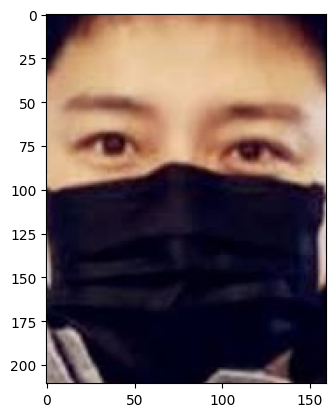

In [ ]:
masked_img = mpimg.imread('/content/data/with_mask/with_mask_519.jpg')
imgplot = plt.imshow(masked_img)
plt.show()

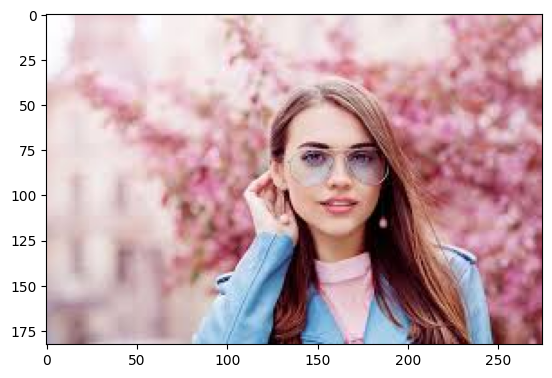

In [ ]:
not_masked_img = mpimg.imread('/content/data/without_mask/without_mask_3119.jpg')
imgplot = plt.imshow(not_masked_img)
plt.show()

In [ ]:
# Image processing for training NN

mask_path = '/content/data/with_mask/'

data = []

for img in mask_file:
  image = Image.open(mask_path + img)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
without_mask_path = '/content/data/without_mask/'

for img in without_mask_file:
  image = Image.open(without_mask_path + img)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
x = np.array(data)
y = np.array(labels)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[0]

array([[[0.84705882, 0.84705882, 0.84705882],
        [0.84705882, 0.84705882, 0.84705882],
        [0.84705882, 0.84705882, 0.84705882],
        ...,
        [0.67058824, 0.67843137, 0.63921569],
        [0.67843137, 0.69411765, 0.66666667],
        [0.69803922, 0.7254902 , 0.69411765]],

       [[0.84705882, 0.84705882, 0.84705882],
        [0.84705882, 0.84705882, 0.84705882],
        [0.84705882, 0.84705882, 0.84705882],
        ...,
        [0.6745098 , 0.67843137, 0.64313725],
        [0.67843137, 0.69411765, 0.66666667],
        [0.69803922, 0.7254902 , 0.69411765]],

       [[0.85098039, 0.85098039, 0.85098039],
        [0.85098039, 0.85098039, 0.85098039],
        [0.85098039, 0.85098039, 0.85098039],
        ...,
        [0.6745098 , 0.68235294, 0.64313725],
        [0.67843137, 0.69411765, 0.66666667],
        [0.69803922, 0.7254902 , 0.69411765]],

       ...,

       [[0.74117647, 0.74901961, 0.70588235],
        [0.74509804, 0.75294118, 0.70980392],
        [0.74901961, 0

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.6005 - loss: 0.7575 - val_accuracy: 0.8983 - val_loss: 0.3129
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8480 - loss: 0.3660 - val_accuracy: 0.9082 - val_loss: 0.2502
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8640 - loss: 0.3433 - val_accuracy: 0.9123 - val_loss: 0.2138
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8787 - loss: 0.2952 - val_accuracy: 0.9107 - val_loss: 0.2231
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8919 - loss: 0.2539 - val_accuracy: 0.9189 - val_loss: 0.2165


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9048 - loss: 0.2248
Test Accuracy = 0.9046988487243652


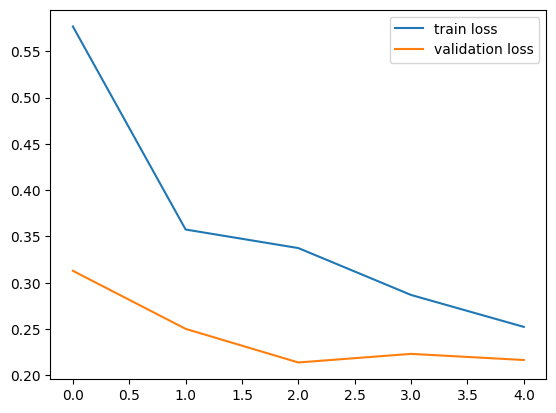

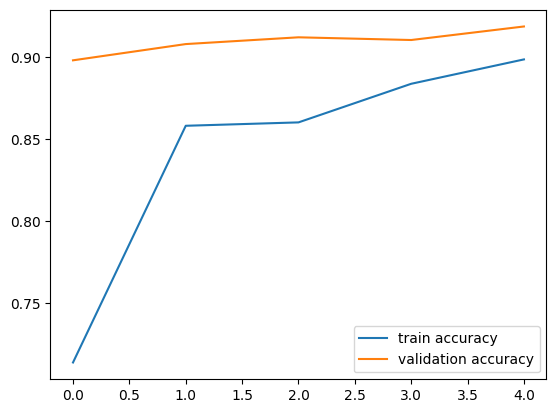

In [ ]:
h = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/data/with_mask/with_mask_1.jpg


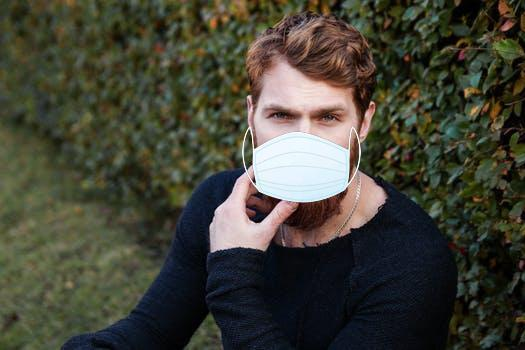

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
[[0.39244047 0.768141  ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')